In [1]:
## Binder/local setup (safe and portable)
from pathlib import Path
import os
import sys

import pandas as pd

# Optional on Binder/local if dependencies are missing:
# %pip install -q -r ../requirements.txt

# Make repo importable without hard-coded machine paths
cwd = Path.cwd().resolve()
repo_root = next((p for p in [cwd, *cwd.parents] if (p / "pynat").exists()), cwd)
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

from pynat import helpers

pd.options.display.max_rows = 250
print(f"Repo root: {repo_root}")
print(f"INAT token set: {bool(os.getenv('INAT_TOKEN'))}")

Repo root: C:\Users\drsvs\Desktop\code
INAT token set: False


In [2]:
%load_ext autoreload
%autoreload 2

### `coming_soon()` quick guide (Binder-ready defaults)

Use this notebook to ask: *what is likely active near me in the next few days?*

- **`kind`**: which group/phenotype to query
  - `any`: all taxa
  - `plants`: Plantae
  - `flowers`: observations tagged with flowering phenotype
  - `fruits` (or `fruit`): observations tagged with fruiting phenotype
  - `mushrooms`: fungi scoped to common mushroom taxon filter
  - `animals`: Animalia
  - `wugs`: invertebrate-focused (`animals` minus vertebrates)
  - `fish`, `herps`, `birds`, `mammals`: common clade presets
  - `butterflies`, `caterpillars`: Lepidoptera filtered by life stage

- **`norm`**: how to rank taxa
  - `None`: raw local counts
  - `time`: normalize by counts for this place (across time)
  - `place`: normalize by counts for this time window (across places)
  - `overall`: normalize by overall counts (broad baseline)

- **Nativity annotation**
  - `nativity_place_id=1297` (Virginia) by default for robust native/introduced/endemic labels
  - Set `nativity_place_id=None` to skip place scoping and infer from global evidence

- **Performance controls**
  - `fast=True`: shorter date window (recommended for Binder)
  - `per_page=25`, `max_pages=2`: lower API load, fewer timeouts
  - `fetch_images=False`: fastest path; set `True` when you want photos
  - `use_cache=True`: reuses responses when available

- **Token note**
  - Works anonymously, but may be rate-limited.
  - For higher limits, set environment variable `INAT_TOKEN` in your session.

In [ ]:
# --- Query configuration (Binder-safe defaults) ---

# Where to search: (latitude, longitude, radius_km)
target_loc = (37.66933, -77.81001, 42)

# What to search for (see markdown cell above for full list)
kind = "flowers"

# Number of taxa rows to return
limit = 7

# Ranking mode: None | "time" | "place" | "overall"
norm = "overall"

# Binder-safe speed settings
fast = False
per_page = 25
max_pages = 2
use_cache = True

# Images are slower; set True when you want visual output
fetch_images = True

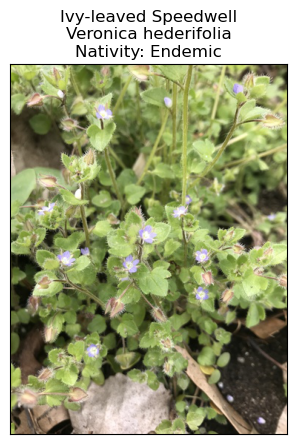

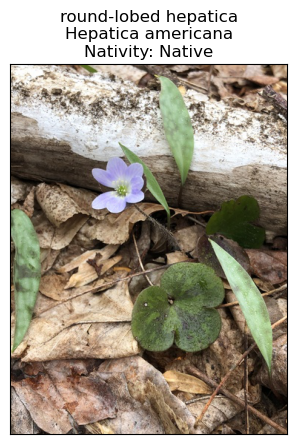

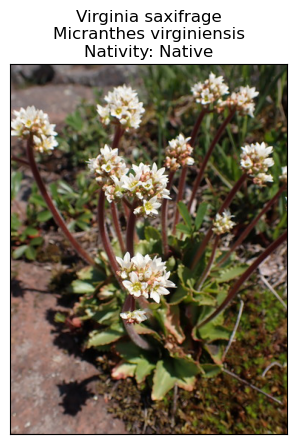

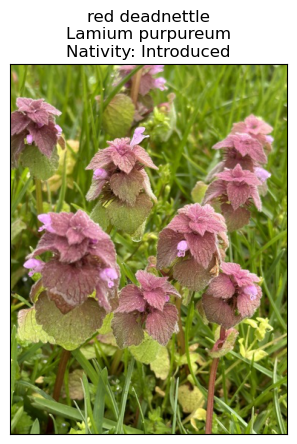

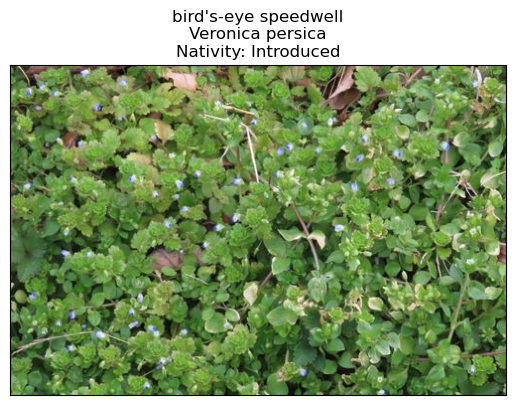

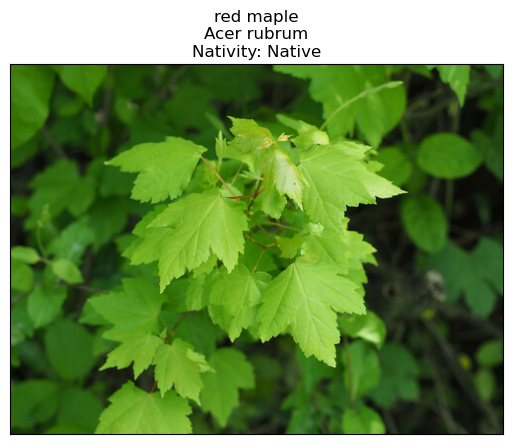

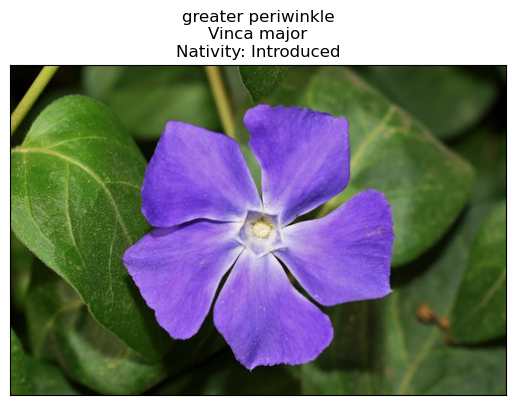

,count,taxon.name,taxon.preferred_common_name,taxon.wikipedia_url
19,10,Veronica hederifolia,Ivy-leaved Speedwell,http://en.wikipedia.org/wiki/Veronica_hederifolia
30,7,Hepatica americana,round-lobed hepatica,http://en.wikipedia.org/wiki/Hepatica_nobilis
27,3,Micranthes virginiensis,Virginia saxifrage,http://en.wikipedia.org/wiki/Micranthes_virgin...
17,23,Lamium purpureum,red deadnettle,http://en.wikipedia.org/wiki/Lamium_purpureum
12,14,Veronica persica,bird's-eye speedwell,http://en.wikipedia.org/wiki/Veronica_persica
2,16,Acer rubrum,red maple,http://en.wikipedia.org/wiki/Acer_rubrum
8,6,Vinca major,greater periwinkle,http://en.wikipedia.org/wiki/Vinca_major


In [ ]:
# Run query
res = helpers.coming_soon(
    kind=kind,
    loc=target_loc,
    norm=norm,
    limit=limit,
    fast=fast,
    per_page=per_page,
    max_pages=max_pages,
    fetch_images=fetch_images,
    use_cache=use_cache,
 )

# Show compact results table
res[["count", "taxon.name", "taxon.preferred_common_name", "taxon.wikipedia_url"]].head(limit)